In [42]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [65]:
import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [43]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fs = 14

Load the data

In [45]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, _ = loadCrabIMG("../data/Crab/15-30keV/Images")
lc1, lc1_err, lc1_date = loadCrabLC("../data/Crab/15-30keV/Lightcurves")

# ISGRI: 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2, _ = loadCrabIMG("../data/Crab/30-60keV/Images")

# JEM-X: 3 - 15 keV
cr3, vr3, sg3, xp3, acr3, avr3, cr3_cpsf, cr3_psf, err3_cpsf, err3_psf, date3, _ = loadCrabIMG("../data/Crab/3-15keV/Images")

/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:306: OptimizeWarning: Covariance of the parameters could not be estimated
  popt2, pcov2 = curve_fit(Gaussian2D, xy, z, p0=[cr, x_int, y_int,  np.sqrt(vr),  np.sqrt(vr), 0, 0])
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:305: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(Gaussian2D_fixed, xy, z, p0=[cr, x_int, y_int])


/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:42: RuntimeWarning: invalid value encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:43: RuntimeWarning: invalid value encountered in scalar divide
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:44: RuntimeWarning: invalid value encountered in scalar divide
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  c = (np.

Error processing file ../data/Crab/3-15keV/Images/268600140010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/054100190010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/036500830010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/060500110010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/048300560010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/101900900010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/077400150010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/035200470010.001mosaic.fits: list index out of range


Prepare data for plotting and analysis

In [ ]:
# Parse times
img_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1]
lc_times1 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date]

# Mask where all data are non-zero
mask_img = cr1 != 0
mask_lc = lc1 != 0

# Apply mask
cr1 = cr1[mask_img]
acr1 = acr1[mask_img]
cr1_psf = cr1_psf[mask_img]
cr1_cpsf = cr1_cpsf[mask_img]
vr1 = vr1[mask_img]
avr1 = avr1[mask_img]
img_times1 = img_times1[mask_img]

lc1 = lc1[mask_lc]
lc1_err = lc1_err[mask_lc]
lc_times1 = lc_times1[mask_lc]

# Averages and std deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)
avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# Sort both time arrays along with their corresponding data arrays
sorted_img_times1, sorted_cr1, sorted_vr1 = zip(*sorted(zip(img_times1, cr1, vr1)))
sorted_lc_times1, sorted_lc1, sorted_lc1_err = zip(*sorted(zip(lc_times1, lc1, lc1_err)))

# Convert to NumPy arrays
sorted_img_times1 = np.array(sorted_img_times1)
sorted_cr1 = np.array(sorted_cr1)
sorted_vr1 = np.array(sorted_vr1)
sorted_lc_times1 = np.array(sorted_lc_times1)
sorted_lc1 = np.array(sorted_lc1)
sorted_lc1_err = np.array(sorted_lc1_err)

# Calculate offsets and mean
offsets = sorted_lc1 - sorted_cr1
avg_offset = np.mean(offsets)

# Yearly averages of cr1
yearly_avg_cr1 = []
yearly_avg_vr1 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times1) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr1.append(np.mean(sorted_cr1[indices][sorted_cr1[indices] > 0]))
        yearly_avg_vr1.append(np.mean(sorted_vr1[indices][sorted_vr1[indices] > 0]))
    else:
        yearly_avg_cr1.append(np.nan)
        yearly_avg_vr1.append(np.nan)


### 15 - 30 keV

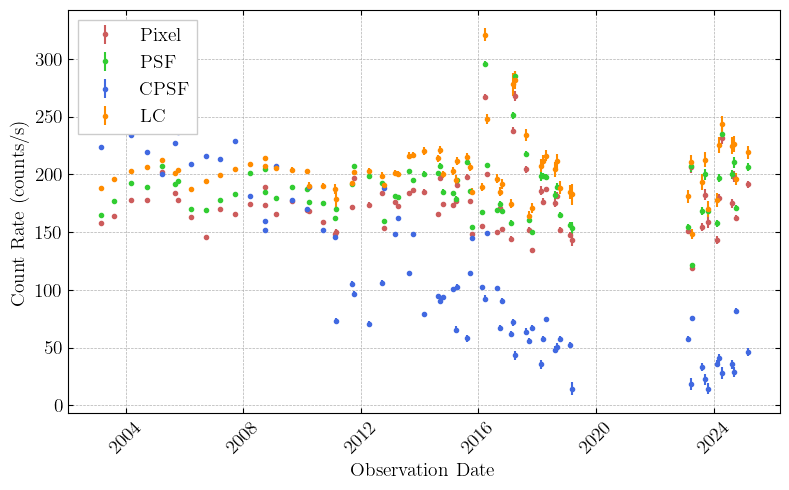

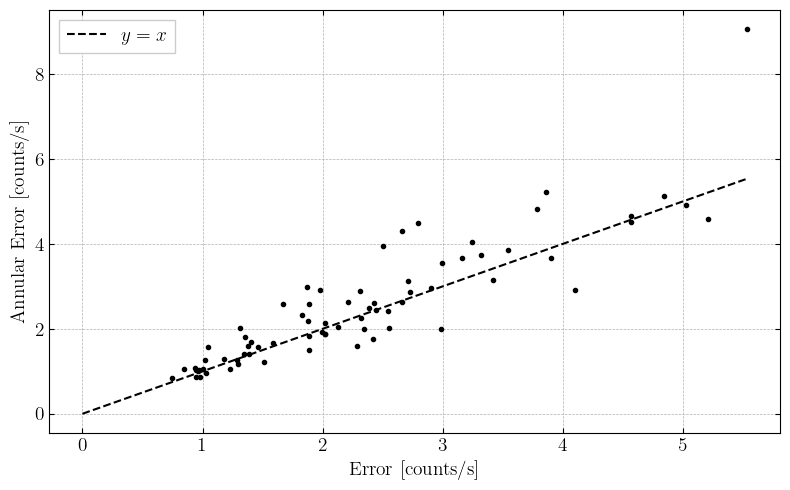

In [47]:
# --- Count Rate vs Time Plot ---
plt.figure(figsize=(8, 5))

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color='indianred', fmt='.', capsize=0, label=r'Pixel')
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color='limegreen', fmt='.', capsize=0, label=r'PSF')
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color='royalblue', fmt='.', capsize=0, label=r'CPSF')
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color='darkorange', fmt='.', capsize=0, label=r'LC')

# Horizontal average lines
#plt.axhline(avg_cr1, color='indianred', linestyle='--')
#plt.axhline(avg_psf1, color='limegreen', linestyle='-.')
#plt.axhline(avg_cpsf1, color='royalblue', linestyle=':')
#plt.axhline(avg_lc1, color='darkorange', linestyle='-.')

plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Count Rate (counts/s)', fontsize=fs)
plt.xticks(rotation=45)

# Standardized ticks and layout
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


# --- Error vs Annular Error Plot ---
plt.figure(figsize=(8, 5))

x = np.linspace(0, np.max(np.sqrt(vr1)), 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')
plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='.', capsize=5, color='k')

plt.xlabel(r'Error [counts/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s]', fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


Offset between pixel and PSF extraction methods

Average offset between LC and pixel:  29.75369628488201


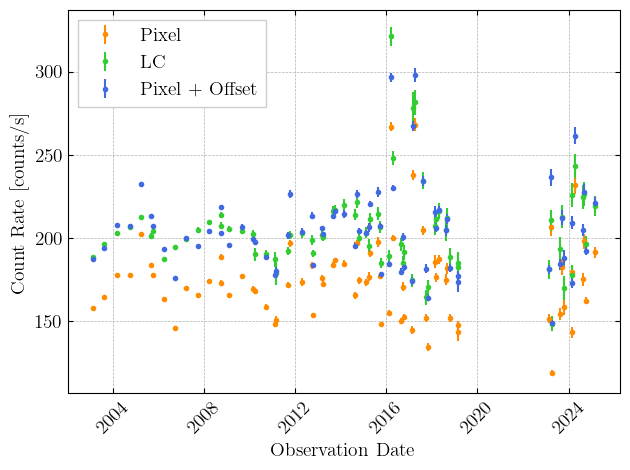

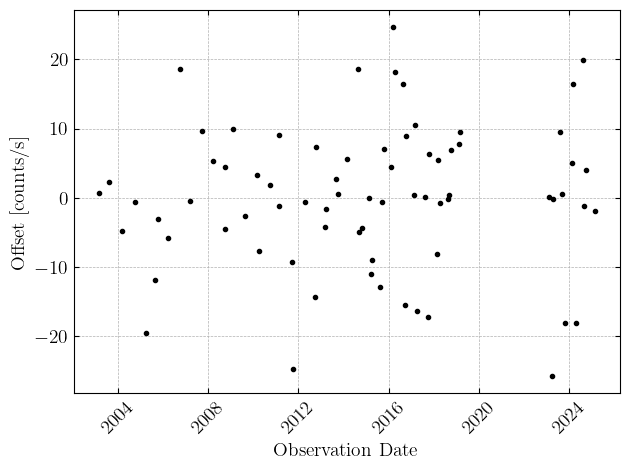

In [48]:
print("Average offset between LC and pixel: ", avg_offset)

# First figure: count rates and offset
plt.figure()
plt.errorbar(sorted_img_times1, sorted_cr1, yerr=np.sqrt(sorted_vr1), color='darkorange', fmt='.', capsize=0, label='Pixel')
plt.errorbar(sorted_lc_times1, sorted_lc1, yerr=sorted_lc1_err, color='limegreen', fmt='.', capsize=0, label='LC')
plt.errorbar(sorted_img_times1, sorted_cr1 + avg_offset, yerr=np.sqrt(sorted_vr1), color='royalblue', fmt='.', capsize=0, label='Pixel + Offset')

plt.xlabel(r"Observation Date", fontsize=fs)
plt.ylabel(r"Count Rate [counts/s]", fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

# Second figure: offset residuals
plt.figure()
plt.errorbar(sorted_img_times1, offsets - avg_offset, color='k', fmt='.', capsize=0, label='Offset Residual')

plt.xlabel(r"Observation Date", fontsize=fs)
plt.ylabel(r"Offset [counts/s]", fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


Yearly averages (not weighted)

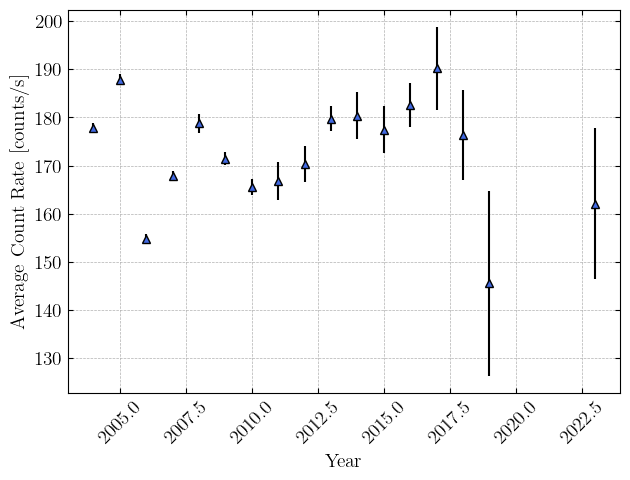

In [49]:
# Plot yearly averages
plt.figure()

plt.errorbar(
    range(2004, 2024), yearly_avg_cr1, yerr=yearly_avg_vr1,
    fmt='^', capsize=0, 
    markerfacecolor='royalblue',
    markeredgecolor='k',
    ecolor='k'
)

plt.xlabel("Year", fontsize=fs)
plt.ylabel("Average Count Rate [counts/s]", fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

Comparison with background

Number of detections (S/N > 3): 73
Number of negative detections (S/N < -3): 0



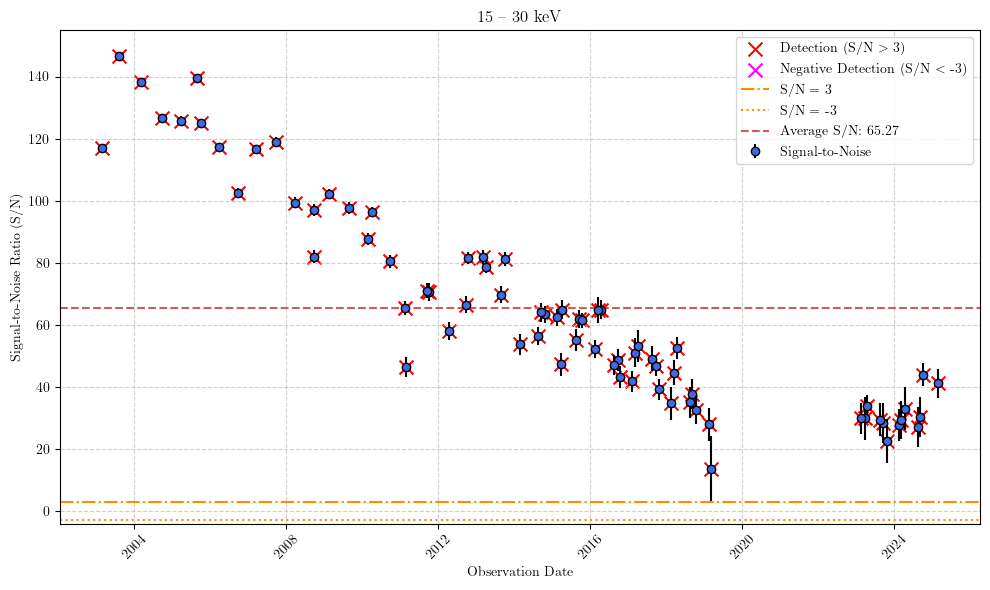

In [50]:
signal = np.array(cr1) - np.array(acr1)
noise = np.sqrt(np.array(vr1) + np.array(avr1))

SNR = signal / noise

detections = SNR > 3
inverse_detections = SNR < -3 

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times1)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# print("Detection dates: ", detection_times)
# print("Detection SCWs: ", [scws[idx] for idx in detection_idxs])

    
# Plotting S/N over time
plt.figure(figsize=(10, 6))
plt.errorbar(img_times1, SNR, yerr=noise, fmt='o', capsize=0, label='Signal-to-Noise', markerfacecolor='royalblue', markeredgecolor='k', ecolor='k')
plt.scatter(np.array(img_times1)[detections], SNR[detections], color='r', marker='x', s=100, label=r'Detection (S/N $>$ 3)')
plt.scatter(np.array(img_times1)[inverse_detections], SNR[inverse_detections], color='magenta', marker='x', s=100, label=r'Negative Detection (S/N $<$ -3)')
plt.axhline(3, color='darkorange', linestyle='-.', label='S/N = 3')
plt.axhline(-3, color='darkorange', linestyle=':', label='S/N = -3')
plt.axhline(np.nanmean(SNR), color='indianred', linestyle='--', label=f'Average S/N: {np.nanmean(SNR):.2f}')
plt.xlabel("Observation Date")
plt.ylabel("Signal-to-Noise Ratio (S/N)")
plt.title("15 – 30 keV")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(loc='upper right')
plt.tight_layout()

### 30 - 60 keV

Prepare the data

In [51]:
img_times2 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2]

# Calculate averages and standard deviations
avg_cr2 = np.mean(cr2)
std_cr2 = np.std(cr2)
avg_psf2 = np.mean(cr2_psf)
std_psf2 = np.std(cr2_psf)
avg_cpsf2 = np.mean(cr2_cpsf)
std_cpsf2 = np.std(cr2_cpsf)

# Sort by time
sorted_img_times2, sorted_cr2, sorted_vr2 = zip(*sorted(zip(img_times2, cr2, vr2)))
sorted_img_times2 = np.array(sorted_img_times2)
sorted_cr2 = np.array(sorted_cr2)
sorted_vr2 = np.array(sorted_vr2)

# Yearly averages
years = range(2003, 2025)
yearly_avg_cr2 = []
yearly_avg_vr2 = []

for year in years:
    indices = [i for i, date in enumerate(sorted_img_times2) if date.year == year]
    if indices:
        valid_cr = sorted_cr2[indices]
        valid_vr = sorted_vr2[indices]
        yearly_avg_cr2.append(np.mean(valid_cr[valid_cr > 0]))
        yearly_avg_vr2.append(np.mean(valid_vr[valid_vr > 0]))
    else:
        yearly_avg_cr2.append(np.nan)
        yearly_avg_vr2.append(np.nan)

yearly_avg_cr2 = np.array(yearly_avg_cr2)
yearly_avg_vr2 = np.array(yearly_avg_vr2)

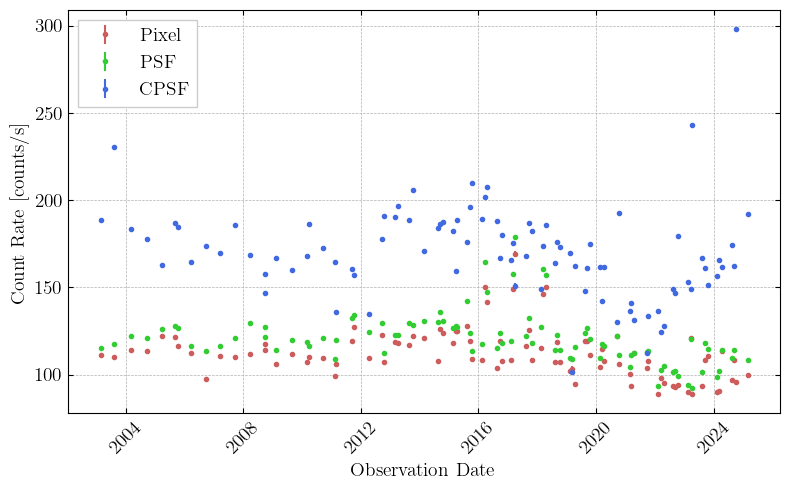

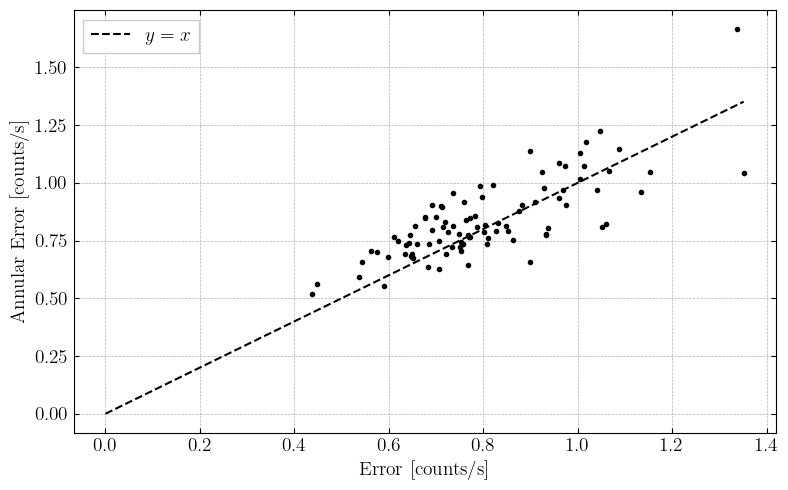

In [52]:
# --- Count Rate vs Time Plot ---
plt.figure(figsize=(8, 5))

plt.errorbar(img_times2, cr2, yerr=np.sqrt(vr2), color='indianred', fmt='.', capsize=0, label=r'Pixel')
plt.errorbar(img_times2, cr2_psf, yerr=np.sqrt(vr2), color='limegreen', fmt='.', capsize=0, label=r'PSF')
plt.errorbar(img_times2, cr2_cpsf, yerr=np.sqrt(vr2), color='royalblue', fmt='.', capsize=0, label=r'CPSF')

# Optional horizontal average lines (uncomment if desired)
#plt.axhline(avg_cr2, color='indianred', linestyle='--')
#plt.axhline(avg_psf2, color='limegreen', linestyle='-.')
#plt.axhline(avg_cpsf2, color='royalblue', linestyle=':')

plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Count Rate [counts/s]', fontsize=fs)
plt.xticks(rotation=45)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()


# --- Error vs Annular Error Plot ---
plt.figure(figsize=(8, 5))

x = np.linspace(0, np.max(np.sqrt(vr2)), 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')
plt.errorbar(np.sqrt(vr2), np.sqrt(avr2), fmt='.', capsize=0, color='k')

plt.xlabel(r'Error [counts/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s]', fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

Yearl averages (not weighted)

Yearly average count rates (30 - 60 keV):
2003: 110.78 ± 0.34 counts/s
2004: 113.78 ± 0.49 counts/s
2005: 120.13 ± 0.60 counts/s
2006: 104.94 ± 0.55 counts/s
2007: 110.32 ± 0.50 counts/s
2008: 114.41 ± 0.82 counts/s
2009: 108.91 ± 0.60 counts/s
2010: 108.88 ± 0.54 counts/s
2011: 113.00 ± 0.90 counts/s
2012: 113.25 ± 0.72 counts/s
2013: 118.99 ± 0.45 counts/s
2014: 119.90 ± 0.64 counts/s
2015: 120.65 ± 0.58 counts/s
2016: 121.91 ± 0.60 counts/s
2017: 129.49 ± 0.88 counts/s
2018: 124.12 ± 0.80 counts/s
2019: 108.33 ± 0.88 counts/s
2020: 110.98 ± 0.77 counts/s
2021: 103.55 ± 1.00 counts/s
2022: 93.75 ± 0.66 counts/s
2023: 102.03 ± 0.55 counts/s
2024: 99.25 ± 0.44 counts/s


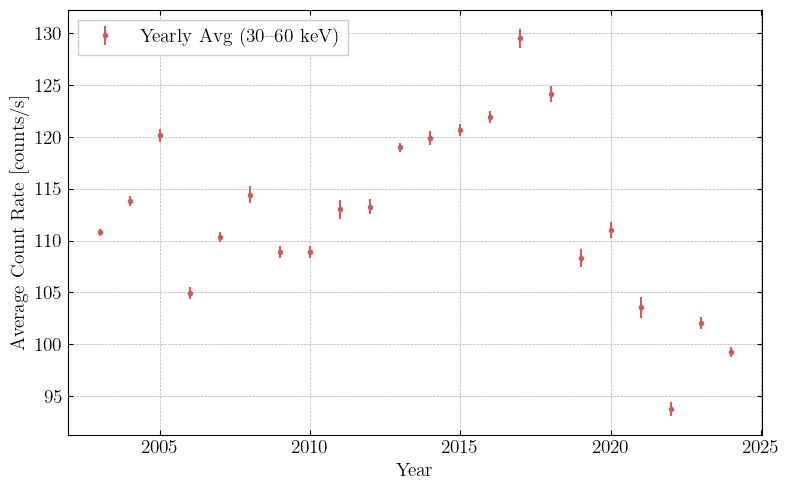

In [53]:
# --- Yearly Average Plot ---
plt.figure(figsize=(8, 5))
plt.errorbar(years, yearly_avg_cr2, yerr=yearly_avg_vr2, fmt='.', capsize=0, color='indianred', label=r'Yearly Avg (30--60 keV)')

plt.xlabel(r'Year', fontsize=fs)
plt.ylabel(r'Average Count Rate [counts/s]', fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

# --- Optional: Print values ---
print("Yearly average count rates (30 - 60 keV):")
for year, avg, var in zip(years, yearly_avg_cr2, yearly_avg_vr2):
    if not np.isnan(avg):
        print(f"{year}: {avg:.2f} ± {var:.2f} counts/s")
    else:
        print(f"{year}: No data")


Number of detections (S/N > 3): 93
Number of negative detections (S/N < -3): 0



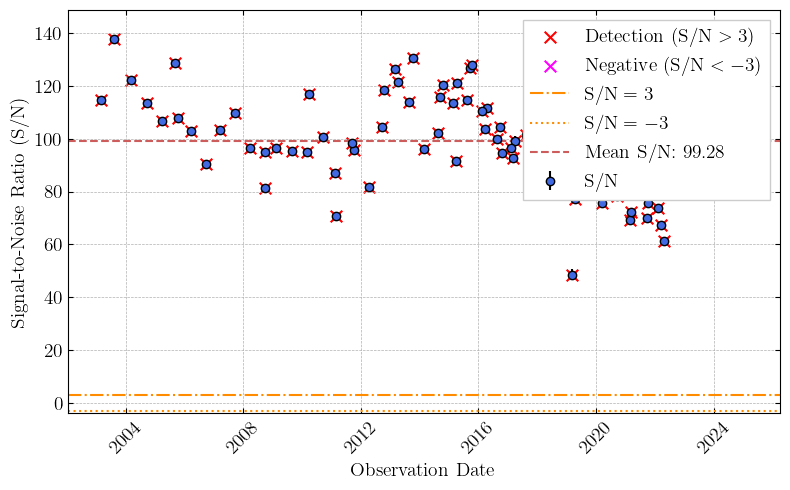

In [54]:
# Compute SNR
signal = np.array(cr2) - np.array(acr2)
noise = np.sqrt(np.array(vr2) + np.array(avr2))
SNR = signal / noise

detections = SNR > 3
inverse_detections = SNR < -3

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

# Matching SCWs for detections
jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times2)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# --- Plot SNR over Time ---
plt.figure(figsize=(8, 5))

plt.errorbar(img_times2, SNR, yerr=noise, fmt='o', capsize=0,
             markerfacecolor='royalblue', markeredgecolor='k', ecolor='k', label=r'S/N')

plt.scatter(np.array(img_times2)[detections], SNR[detections], color='r', marker='x', s=70, label=r'Detection ($\mathrm{S/N} > 3$)')
plt.scatter(np.array(img_times2)[inverse_detections], SNR[inverse_detections], color='magenta', marker='x', s=70, label=r'Negative ($\mathrm{S/N} < -3$)')

plt.axhline(3, color='darkorange', linestyle='-.', label=r'$\mathrm{S/N} = 3$')
plt.axhline(-3, color='darkorange', linestyle=':', label=r'$\mathrm{S/N} = -3$')
plt.axhline(np.nanmean(SNR), color='indianred', linestyle='--', label=fr'Mean S/N: {np.nanmean(SNR):.2f}')

plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Signal-to-Noise Ratio (S/N)', fontsize=fs)

plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper right', fancybox=False, framealpha=1.0)
plt.tight_layout()


### 3 - 15 keV

Prepare the data

In [55]:
img_times3 = [datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date3]

# Averages and standard deviations
avg_cr3 = np.mean(cr3)
std_cr3 = np.std(cr3)
avg_psf3 = np.mean(cr2_psf)
std_psf3 = np.std(cr3_psf)
avg_cpsf3 = np.mean(cr3_cpsf)
std_cpsf3 = np.std(cr3_cpsf)

# Yearly averages of cr1
yearly_avg_cr3 = []
yearly_avg_vr3 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(img_times3) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr3.append(np.mean(cr3[indices][cr3[indices] > 0]))
        yearly_avg_vr3.append(np.mean(vr3[indices][vr3[indices] > 0]))
    else:
        yearly_avg_cr3.append(np.nan)
        yearly_avg_vr3.append(np.nan)

years = list(range(2004, 2024))


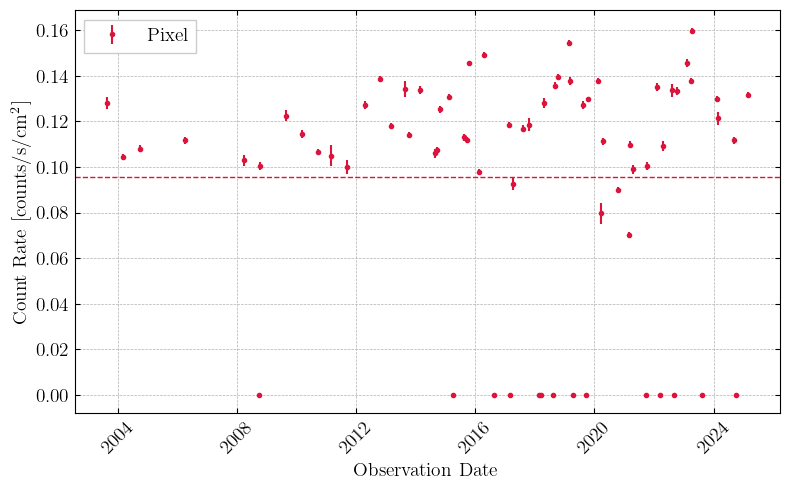

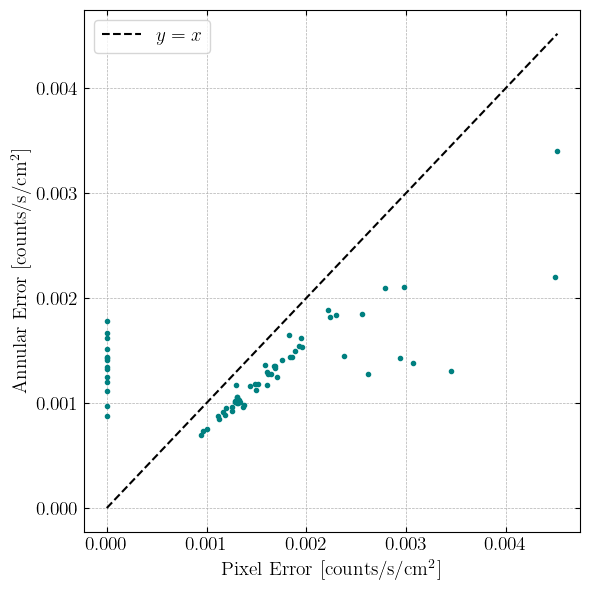

In [56]:
# --- Plot: Count Rate vs. Time ---
plt.figure(figsize=(8, 5))

plt.errorbar(img_times3, cr3, yerr=np.sqrt(vr3), fmt='.', capsize=0, color='crimson', label='Pixel')
# plt.errorbar(img_times3, cr3_psf, yerr=np.sqrt(vr3), fmt='o', capsize=0, color='seagreen', label='PSF')
# plt.errorbar(img_times3, cr3_cpsf, yerr=np.sqrt(vr3), fmt='o', capsize=0, color='royalblue', label='Constrained PSF')

plt.axhline(avg_cr3, color='crimson', linestyle='--', linewidth=1)
# plt.axhline(avg_psf3, color='seagreen', linestyle='-.', linewidth=1)
# plt.axhline(avg_cpsf3, color='royalblue', linestyle=':', linewidth=1)

plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Count Rate [counts/s/cm$^2$]', fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='best', fancybox=False, framealpha=1.0)
plt.tight_layout()

# --- Plot: Annular Error vs. Pixel Error ---
plt.figure(figsize=(6, 6))

x = np.linspace(0, np.max(np.sqrt(vr3)), 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')

plt.errorbar(np.sqrt(vr3), np.sqrt(avr3), fmt='.', capsize=0, color='teal', ecolor='gray')

plt.xlabel(r'Pixel Error [counts/s/cm$^2$]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s/cm$^2$]', fontsize=fs)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left')
plt.tight_layout()


Yearly averages (not weighted)

Yearly average count rates (3–15 keV):
2004: 0.1062 ± 0.0000 counts/s/cm²
2005: No data
2006: 0.1117 ± 0.0000 counts/s/cm²
2007: No data
2008: 0.1016 ± 0.0000 counts/s/cm²
2009: 0.1225 ± 0.0000 counts/s/cm²
2010: 0.1105 ± 0.0000 counts/s/cm²
2011: 0.1025 ± 0.0000 counts/s/cm²
2012: 0.1330 ± 0.0000 counts/s/cm²
2013: 0.1221 ± 0.0000 counts/s/cm²
2014: 0.1181 ± 0.0000 counts/s/cm²
2015: 0.1254 ± 0.0000 counts/s/cm²
2016: 0.1235 ± 0.0000 counts/s/cm²
2017: 0.1116 ± 0.0000 counts/s/cm²
2018: 0.1345 ± 0.0000 counts/s/cm²
2019: 0.1373 ± 0.0000 counts/s/cm²
2020: 0.1046 ± 0.0000 counts/s/cm²
2021: 0.0949 ± 0.0000 counts/s/cm²
2022: 0.1279 ± 0.0000 counts/s/cm²
2023: 0.1477 ± 0.0000 counts/s/cm²


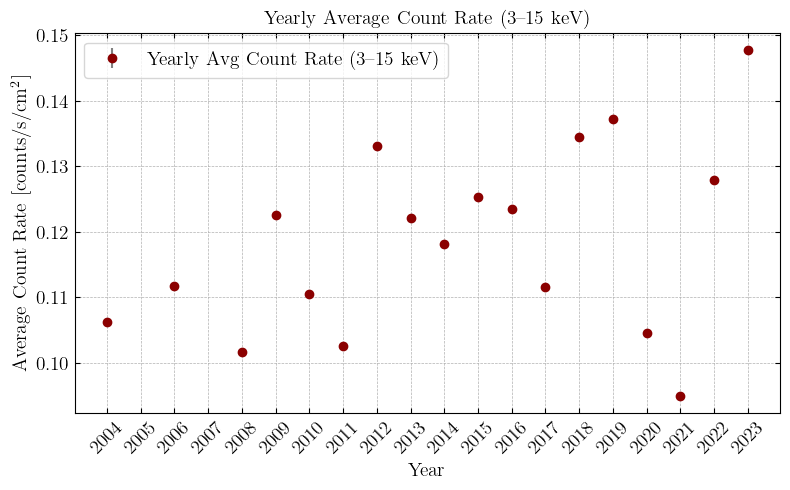

In [57]:
# Plot: Yearly average count rate
plt.figure(figsize=(8, 5))

plt.errorbar(
    years, 
    yearly_avg_cr3, 
    yerr=yearly_avg_vr3, 
    fmt='o', 
    capsize=0, 
    color='darkred', 
    ecolor='gray',
    label=r'Yearly Avg Count Rate (3--15 keV)'
)

plt.xlabel(r'Year', fontsize=fs)
plt.ylabel(r'Average Count Rate [counts/s/cm$^2$]', fontsize=fs)
plt.xticks(years, rotation=45)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title(r'Yearly Average Count Rate (3--15 keV)', fontsize=fs)
plt.tight_layout()
plt.legend(fontsize=fs)

# Print table
print("Yearly average count rates (3–15 keV):")
for year, avg, var in zip(years, yearly_avg_cr3, yearly_avg_vr3):
    if np.isnan(avg):
        print(f"{year}: No data")
    else:
        print(f"{year}: {avg:.4f} ± {var:.4f} counts/s/cm²")


Number of detections (S/N > 3): 56
Number of negative detections (S/N < -3): 0



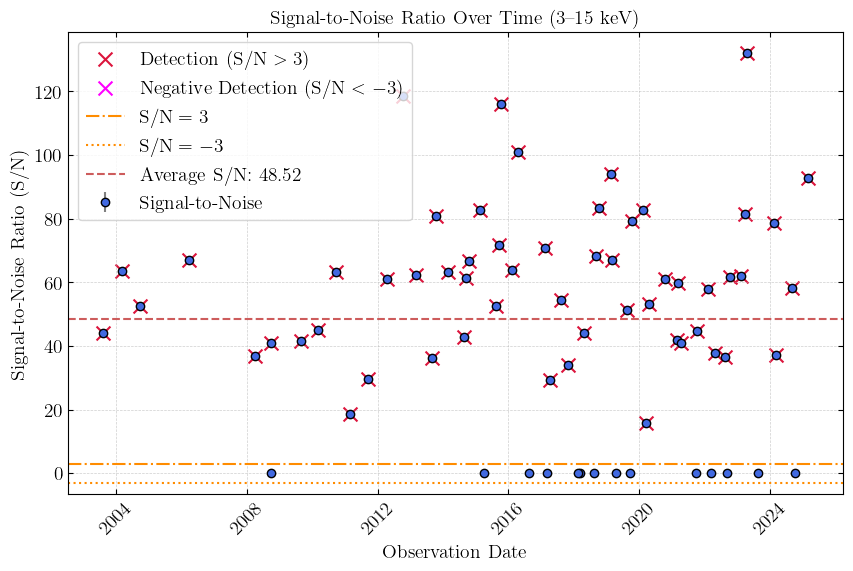

In [58]:
signal = np.array(cr3) - np.array(acr3)
noise = np.sqrt(np.array(vr3) + np.array(avr3))

SNR = signal / noise

detections = SNR > 3
inverse_detections = SNR < -3 

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times3)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# print("Detection dates: ", detection_times)
# print("Detection SCWs: ", [scws[idx] for idx in detection_idxs])


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fs = 14  # base font size

plt.figure(figsize=(10, 6))

# Main S/N data points
plt.errorbar(
    img_times3, 
    SNR, 
    yerr=noise, 
    fmt='o', 
    capsize=0, 
    markerfacecolor='royalblue', 
    markeredgecolor='k', 
    ecolor='gray', 
    label=r'Signal-to-Noise'
)

# Detections: S/N > 3
plt.scatter(
    np.array(img_times3)[detections], 
    SNR[detections], 
    color='crimson', 
    marker='x', 
    s=100, 
    label=r'Detection ($\mathrm{S/N} > 3$)'
)

# Negative detections: S/N < -3
plt.scatter(
    np.array(img_times3)[inverse_detections], 
    SNR[inverse_detections], 
    color='magenta', 
    marker='x', 
    s=100, 
    label=r'Negative Detection ($\mathrm{S/N} < -3$)'
)

# Reference lines
plt.axhline(3, color='darkorange', linestyle='-.', label=r'$\mathrm{S/N} = 3$')
plt.axhline(-3, color='darkorange', linestyle=':', label=r'$\mathrm{S/N} = -3$')
plt.axhline(np.nanmean(SNR), color='indianred', linestyle='--', label=fr'Average S/N: {np.nanmean(SNR):.2f}')

# Labels and formatting
plt.xlabel(r'Observation Date', fontsize=fs)
plt.ylabel(r'Signal-to-Noise Ratio (S/N)', fontsize=fs)
plt.title(r'Signal-to-Noise Ratio Over Time (3--15 keV)', fontsize=fs)
plt.xticks(rotation=45)
plt.tick_params(which='both', direction='in', labelsize=fs)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=fs, loc='upper left')


## Weighted averages (all energy bands)

In [67]:
# Calculate weighted averages for 15 - 30 keV
total_15_30, yearly_15_30 = weighted_avg(date1, cr1, vr1)

# Calculate weighted averages for 30 - 60 keV
total_30_60, yearly_30_60 = weighted_avg(date2, cr2, vr2)

# Calculate weighted averages for 3 - 15 keV
total_3_15, yearly_3_15 = weighted_avg(date3, cr3, vr3)

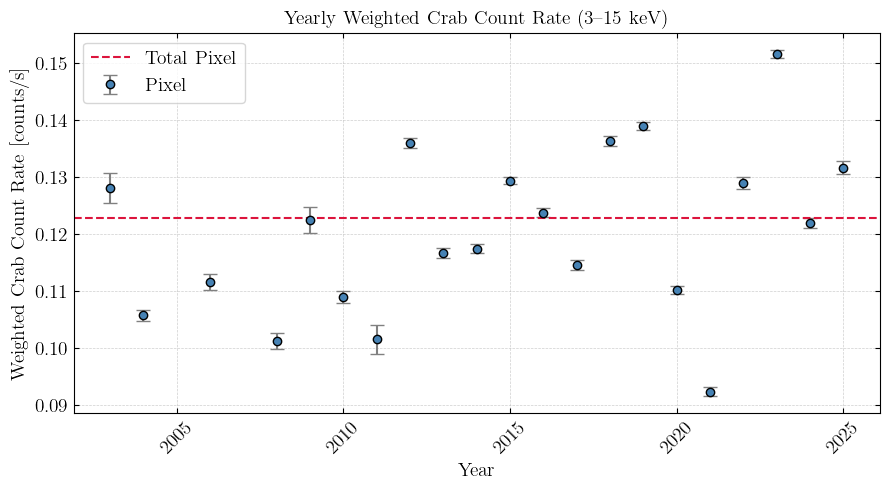

Yearly weighted means:
2003: 0.1281 ± 0.0026 counts/s
2004: 0.1057 ± 0.0010 counts/s
2006: 0.1117 ± 0.0014 counts/s
2008: 0.1013 ± 0.0014 counts/s
2009: 0.1225 ± 0.0023 counts/s
2010: 0.1090 ± 0.0011 counts/s
2011: 0.1016 ± 0.0025 counts/s
2012: 0.1360 ± 0.0008 counts/s
2013: 0.1167 ± 0.0009 counts/s
2014: 0.1175 ± 0.0008 counts/s
2015: 0.1294 ± 0.0006 counts/s
2016: 0.1238 ± 0.0008 counts/s
2017: 0.1146 ± 0.0009 counts/s
2018: 0.1363 ± 0.0009 counts/s
2019: 0.1389 ± 0.0007 counts/s
2020: 0.1102 ± 0.0007 counts/s
2021: 0.0924 ± 0.0008 counts/s
2022: 0.1289 ± 0.0010 counts/s
2023: 0.1515 ± 0.0007 counts/s
2024: 0.1220 ± 0.0009 counts/s
2025: 0.1317 ± 0.0011 counts/s


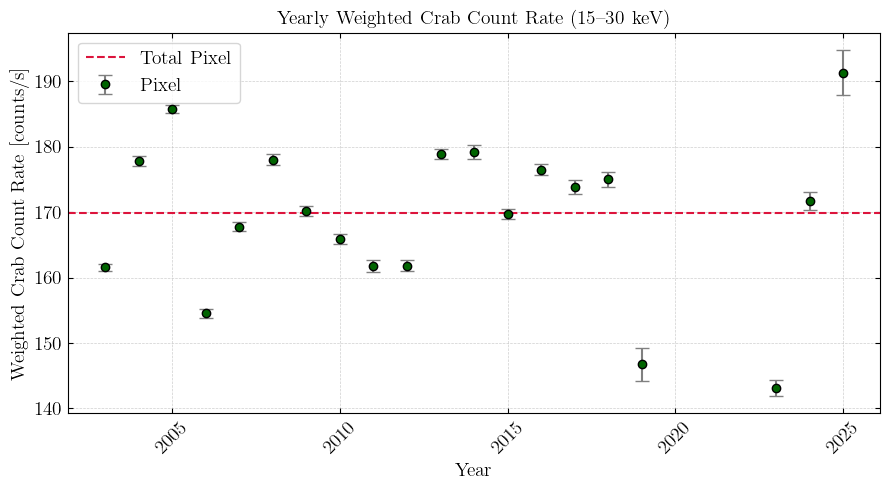

Yearly weighted means:
2003: 161.5728 ± 0.5608 counts/s
2004: 177.7961 ± 0.6983 counts/s
2005: 185.7823 ± 0.6005 counts/s
2006: 154.5192 ± 0.6707 counts/s
2007: 167.7344 ± 0.6891 counts/s
2008: 177.9971 ± 0.8013 counts/s
2009: 170.1336 ± 0.7985 counts/s
2010: 165.8518 ± 0.7459 counts/s
2011: 161.7835 ± 0.9108 counts/s
2012: 161.8372 ± 0.8666 counts/s
2013: 178.8558 ± 0.7777 counts/s
2014: 179.2052 ± 1.1026 counts/s
2015: 169.7301 ± 0.7876 counts/s
2016: 176.4681 ± 0.8210 counts/s
2017: 173.8377 ± 1.1071 counts/s
2018: 174.9784 ± 1.1788 counts/s
2019: 146.7505 ± 2.4959 counts/s
2023: 143.1424 ± 1.2551 counts/s
2024: 171.6538 ± 1.4054 counts/s
2025: 191.3208 ± 3.4208 counts/s


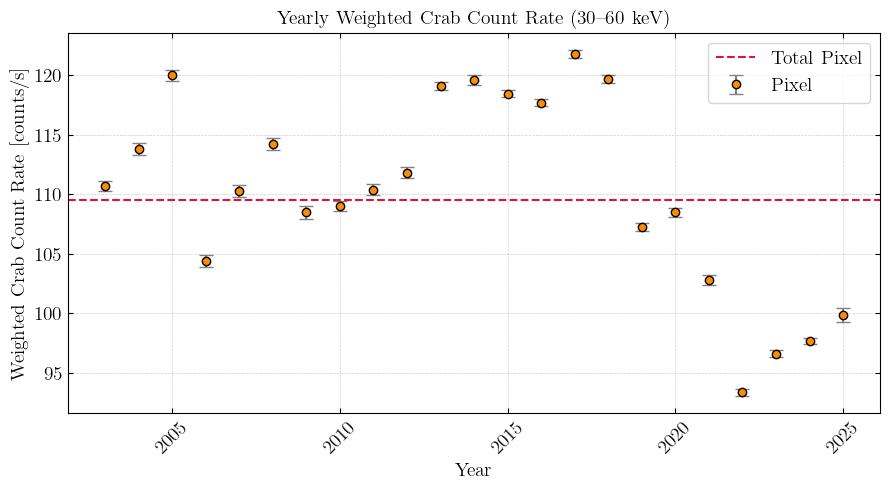

Yearly weighted means:
2003: 110.6950 ± 0.4059 counts/s
2004: 113.7914 ± 0.4951 counts/s
2005: 120.0044 ± 0.4413 counts/s
2006: 104.4083 ± 0.5231 counts/s
2007: 110.3165 ± 0.4982 counts/s
2008: 114.2487 ± 0.5210 counts/s
2009: 108.4912 ± 0.5432 counts/s
2010: 109.0454 ± 0.4197 counts/s
2011: 110.3905 ± 0.4513 counts/s
2012: 111.8378 ± 0.4345 counts/s
2013: 119.0823 ± 0.3318 counts/s
2014: 119.6182 ± 0.3975 counts/s
2015: 118.4668 ± 0.2889 counts/s
2016: 117.7103 ± 0.3021 counts/s
2017: 121.7796 ± 0.3460 counts/s
2018: 119.6982 ± 0.3471 counts/s
2019: 107.2904 ± 0.3479 counts/s
2020: 108.4926 ± 0.3534 counts/s
2021: 102.8194 ± 0.4408 counts/s
2022: 93.3624 ± 0.3073 counts/s
2023: 96.6207 ± 0.2669 counts/s
2024: 97.6742 ± 0.2534 counts/s
2025: 99.9026 ± 0.5894 counts/s


In [68]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fs = 14  # Font size

def plot_weighted_crab(yearly_data, total_data, energy_band, color='royalblue'):
    years = list(yearly_data.keys())
    means = [result['weighted_mean'] for result in yearly_data.values()]
    stds = [result['weighted_std'] for result in yearly_data.values()]
    
    plt.figure(figsize=(9, 5))
    plt.errorbar(
        years, means, yerr=stds, fmt='o', capsize=5, color=color, 
        ecolor='gray', elinewidth=1.5, markeredgecolor='k', label='Pixel'
    )
    
    plt.axhline(total_data['weighted_mean'], color='crimson', linestyle='--', label='Total Pixel')

    plt.xlabel(r'Year', fontsize=fs)
    plt.ylabel(r'Weighted Crab Count Rate [counts/s]', fontsize=fs)
    plt.title(rf'Yearly Weighted Crab Count Rate ({energy_band})', fontsize=fs)
    plt.xticks(rotation=45)
    plt.tick_params(which='both', direction='in', labelsize=fs)
    plt.gca().xaxis.set_ticks_position('both')
    plt.gca().yaxis.set_ticks_position('both')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
    plt.legend(fontsize=fs)
    plt.tight_layout()
    plt.show()

# Apply to each energy band
plot_weighted_crab(yearly_3_15, total_3_15, '3--15 keV', color='steelblue')
print(f"Yearly weighted means:")
for year, result in yearly_3_15.items():
    print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

plot_weighted_crab(yearly_15_30, total_15_30, '15--30 keV', color='darkgreen')
print(f"Yearly weighted means:")
for year, result in yearly_15_30.items():
    print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

plot_weighted_crab(yearly_30_60, total_30_60, '30--60 keV', color='darkorange')
print(f"Yearly weighted means:")
for year, result in yearly_30_60.items():
    print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

# Save weighted averages to a file
with open('../data/weighted_crab_averages.txt', 'w') as f:
    f.write("Energy Band\tYear\tWeighted Mean\tWeighted Std\n")
    for year, result in yearly_3_15.items():
        f.write(f"3-15 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")
    for year, result in yearly_15_30.items():
        f.write(f"15-30 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")
    for year, result in yearly_30_60.items():
        f.write(f"30-60 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")